In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Apps dataset columns descriptions:**

This file contains all the details of the apps on Google Play. There are 9 features that describe a given app.

**App:** Name of the app

**Category:** Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc.

**Rating:** The current average rating (out of 5) of the app on Google Play

**Reviews:** Number of user reviews given on the app

**Size:** Size of the app in MB (megabytes)

**Installs:** Number of times the app was downloaded from Google Play

**Type:** Whether the app is paid or free

**Price:** Price of the app in US$

**Last Updated:** Date on which the app was last updated on Google Play

In [5]:
data = pd.read_csv("Desktop/datasets/googleplaystore.csv")
df = data.copy()
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [9]:
print("Satır sayısı: ", df.shape[0])
print("Sütun sayısı: ", df.shape[1])

Satır sayısı:  10841
Sütun sayısı:  13


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**Observation :**
The dataset having 10841 rows and 13 columns.
The columns in the dataset are:

'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'

**Descriptive Statistics (Tanımlayıcı İstatistikler):**

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


**Missing values in the data:**

In [18]:
df.isnull().sum().sort_values(ascending = False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

**Visualisation :**
    
Plot the missing null values.

Text(0.5, 1.0, 'Missing Null Values')

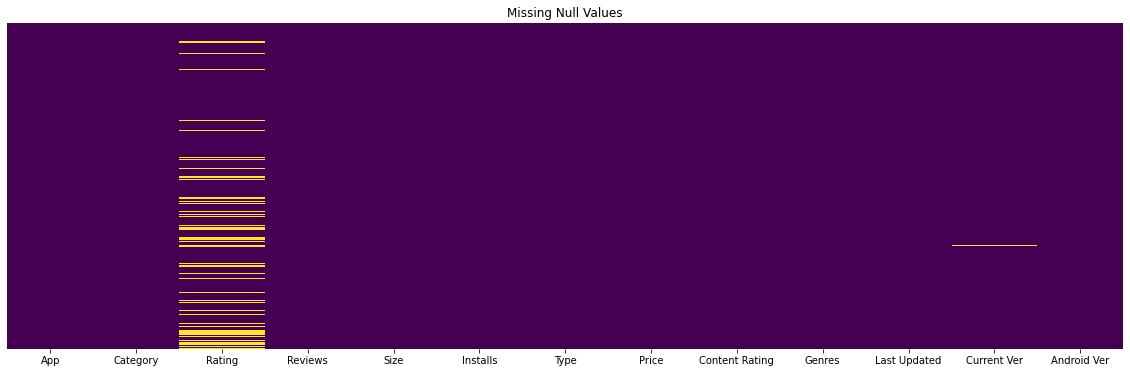

In [19]:
plt.rcParams["figure.figsize"] = (20,6)
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = "viridis")
plt.title("Missing Null Values")

In [20]:
#Verilerdeki eksik gözlemlerin yüzdesini görelim
missing_percentage = df.isnull().sum().sort_values(ascending = False)/len(df)
missing_percentage

Rating            0.135965
Current Ver       0.000738
Android Ver       0.000277
Type              0.000092
Content Rating    0.000092
App               0.000000
Category          0.000000
Reviews           0.000000
Size              0.000000
Installs          0.000000
Price             0.000000
Genres            0.000000
Last Updated      0.000000
dtype: float64

Text(0.5, 1.0, 'Missing Percentage Null Values')

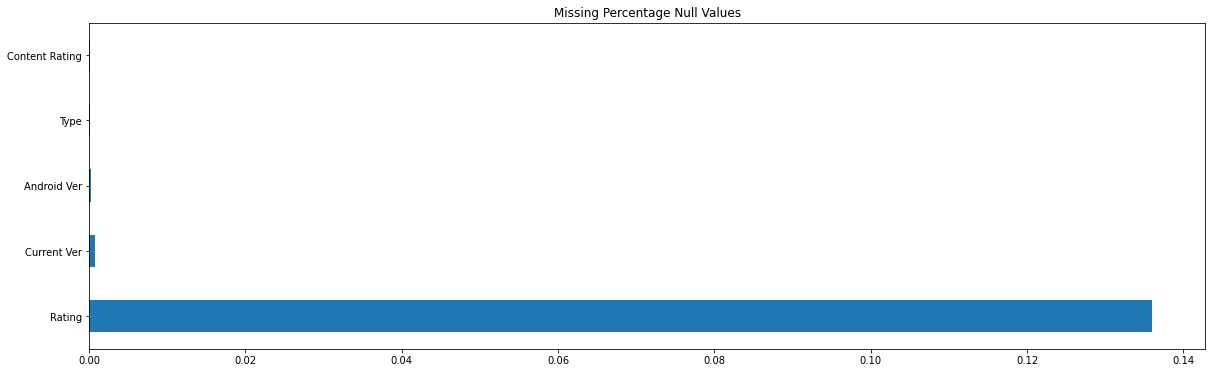

In [21]:
#Eksik boş değerlerin yüzdesini çizelim
missing_percentage = missing_percentage[missing_percentage !=0] # sadece eksik değere sahip sütunları seçtik
plt.rcParams["figure.figsize"] = (20,6) #çubuk grafiğin genişlik ve yüksekliğini belirledik
missing_percentage.plot(kind = "barh") # kind="barh" parametresi, yatay çubuk grafiği
plt.title("Missing Percentage Null Values") #çubuk grafiğinin başlığı

* I'm going to use the median value for missing data in the rating column. Note that the median is more robust than the mean for the outlier values.

In [23]:
rating_median = df["Rating"].median()
print(rating_median)
#"Rating" sütunundaki eksik değerleri medyanla doldurduk.
df["Rating"].fillna(rating_median, inplace= True)

4.3


In [24]:
#Diğer eksik veriler çok az olduğu için kaldıralım
df.dropna(inplace=True)

In [26]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


# Data Preprocessing

In [29]:
# Veri Ön işleme 
# İnceleme sütununun işlenmesi,
# İnceleme türünü sayısal hale getirme

In [35]:
df["Reviews"].describe()

count     10829
unique     5999
top           0
freq        594
Name: Reviews, dtype: object

In [37]:
df["Reviews"] = df["Reviews"].astype("int") #sütunu sayısala çevirdik

In [39]:
df["Reviews"].describe().round()

count       10829.0
mean       444602.0
std       2929213.0
min             0.0
25%            38.0
50%          2100.0
75%         54815.0
max      78158306.0
Name: Reviews, dtype: float64

In [40]:
#verinin ortalaması medyandan büyük
#std sapma değeri de oldukça yüksek
#max değer ortanca değerden yüksek
#Veri setimizde aykırı değerler olduğunu gösteriyor.

In [43]:
print(len(df["Size"].unique())) #Size sütunu uygulamanın boyutunu gösteriyor.
df["Size"].unique()

457


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [45]:
# "M" ve "k" harflerini kaldıralım
df["Size"].replace("M","", regex=True, inplace=True)
df["Size"].replace("k","", regex=True, inplace=True)

In [46]:
df["Size"].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '5.5', '17', '39', '31', '4.2', '7.0',
       '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24',
       'Varies with device', '9.4', '15', '10', '1.2', '26', '8.0', '7.9',
       '56', '57', '35', '54', '201', '3.6', '5.7', '8.6', '2.4', '27',
       '2.7', '2.5', '16', '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4',
       '18', '1.1', '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6',
       '7.1', '3.7', '22', '7.4', '6.4', '3.2', '8.2', '9.9', '4.9',
       '9.5', '5.0', '5.9', '13', '73', '6.8', '3.5', '4.0', '2.3', '7.2',
       '2.1', '42', '7.3', '9.1', '55', '6.5', '1.5', '7.5', '51', '41',
       '48', '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40', '7.8', '8.8',
       '6.6', '5.1', '61', '66', '79', '8.4', '118', '44', '695', '1.6',
       '6.2', '53', '1.4', '3.0', '5.8', '3.8', '9.6', '45', '63', '49',
       '77', '4.4', '4.8', '70', '6.9', '9.3', '10.0', '8.1', '36',

In [47]:
size_median = df[df["Size"]!="Varies with device"]["Size"].astype(float).median()
size_median

15.0

In [48]:
#"Varies with device" metni yerine median değerini atayalım
df["Size"].replace("Varies with device", size_median, inplace=True)

In [49]:
df.Size = pd.to_numeric(df.Size)
df.Size.head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

In [53]:
df.Size.describe().round()

count    10829.0
mean        34.0
std         91.0
min          1.0
25%          7.0
50%         15.0
75%         28.0
max       1020.0
Name: Size, dtype: float64

In [54]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [59]:
#hem "+" hem de "," leri kaldıralım
df.Installs = df.Installs.apply(lambda x:x.replace("+",""))
df.Installs = df.Installs.apply(lambda x:x.replace(",",""))
df.Installs = df.Installs.apply(lambda x:int(x)) #Değerleri int çevirmek için

In [60]:
df["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

In [61]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [62]:
df.Price = df.Price.apply(lambda x:x.replace("$",""))
df.Price = df.Price.apply(lambda x:float(x)) #Değerleri float çevirmek için

In [63]:
df["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [64]:
len(df["Genres"].unique())

119

In [65]:
df["Genres"].head(10)

0                 Art & Design
1    Art & Design;Pretend Play
2                 Art & Design
3                 Art & Design
4      Art & Design;Creativity
5                 Art & Design
6                 Art & Design
7                 Art & Design
8                 Art & Design
9      Art & Design;Creativity
Name: Genres, dtype: object

In [66]:
#satırlardaki değeri ayırdık ve ilk değeri seçtik
df["Genres"] = df["Genres"].str.split(";").str[0] 

In [67]:
len(df["Genres"].unique())

48

In [69]:
df["Genres"].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [70]:
df["Genres"].value_counts()

Genres
Tools                      841
Entertainment              666
Education                  644
Medical                    463
Business                   460
Productivity               424
Sports                     402
Personalization            390
Communication              388
Lifestyle                  383
Action                     382
Finance                    366
Health & Fitness           343
Photography                335
Social                     295
News & Magazines           283
Casual                     270
Shopping                   260
Travel & Local             258
Arcade                     237
Dating                     234
Books & Reference          233
Simulation                 218
Video Players & Editors    178
Puzzle                     166
Maps & Navigation          137
Food & Drink               127
Role Playing               123
Racing                     119
Educational                112
Strategy                   110
Adventure                   91
H

In [71]:
# "Music & Audio" yerine "Music" yazmak için:
df["Genres"].replace("Music & Audio", "Music", inplace=True)

In [72]:
df["Genres"].value_counts()

Genres
Tools                      841
Entertainment              666
Education                  644
Medical                    463
Business                   460
Productivity               424
Sports                     402
Personalization            390
Communication              388
Lifestyle                  383
Action                     382
Finance                    366
Health & Fitness           343
Photography                335
Social                     295
News & Magazines           283
Casual                     270
Shopping                   260
Travel & Local             258
Arcade                     237
Dating                     234
Books & Reference          233
Simulation                 218
Video Players & Editors    178
Puzzle                     166
Maps & Navigation          137
Food & Drink               127
Role Playing               123
Racing                     119
Educational                112
Strategy                   110
Adventure                   91
H

In [76]:
df["Last Updated"].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [78]:
#object olan dtype ı datetime a çeviriyoruz
df["Last Updated"] = pd.to_datetime(df["Last Updated"])

In [79]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design,2018-06-20,1.1,4.4 and up


In [80]:
df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int32
Size                     float64
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

# Data Visualization

<Axes: xlabel='Type'>

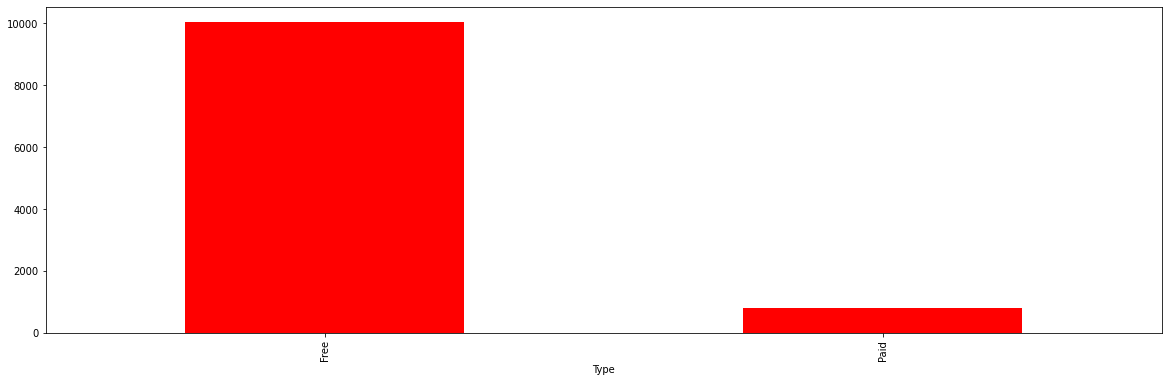

In [81]:
df["Type"].value_counts().plot(kind="bar", color="red")

<Axes: xlabel='Type', ylabel='Rating'>

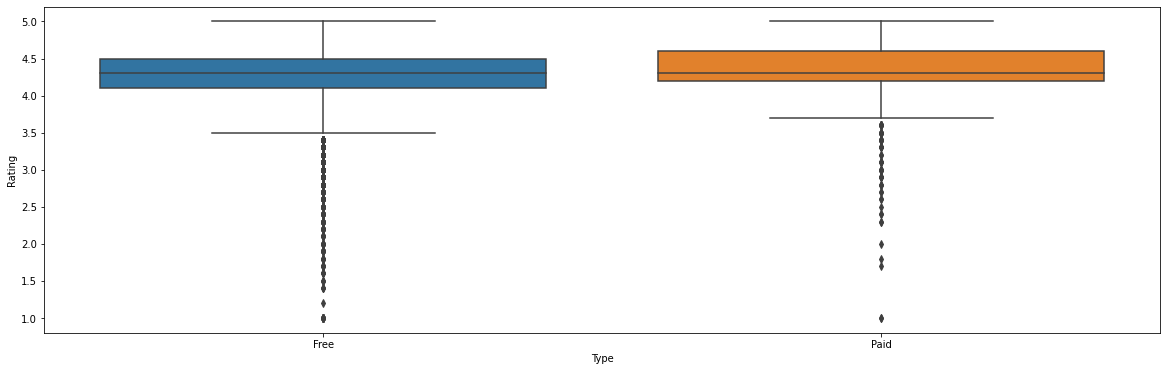

In [83]:
sns.boxplot(x="Type", y="Rating", data=df)
#kutu grafiği, ortadan geçen çizgi: medyan
#sol taraf %25 sag taraf %75 
#üst ve alttaki çizgi çeyrekleri gösterir(alt çeyrek, üst çeyrek)
#mavi: ücretsiz uygulamalar, turuncu: ücretli uygulamalar

Text(0.5, 1.0, 'Content rating with their counts')

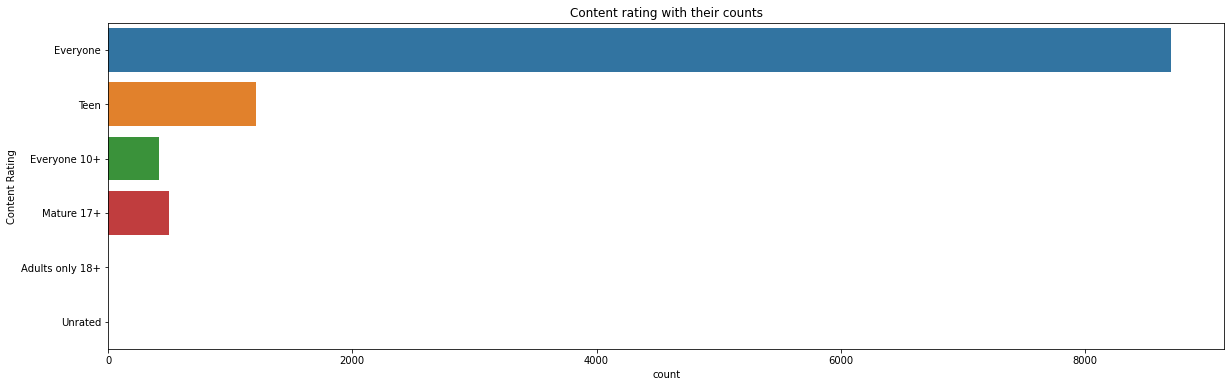

In [87]:
sns.countplot(y="Content Rating", data=df)
plt.title("Content rating with their counts")

<Axes: xlabel='Content Rating', ylabel='Rating'>

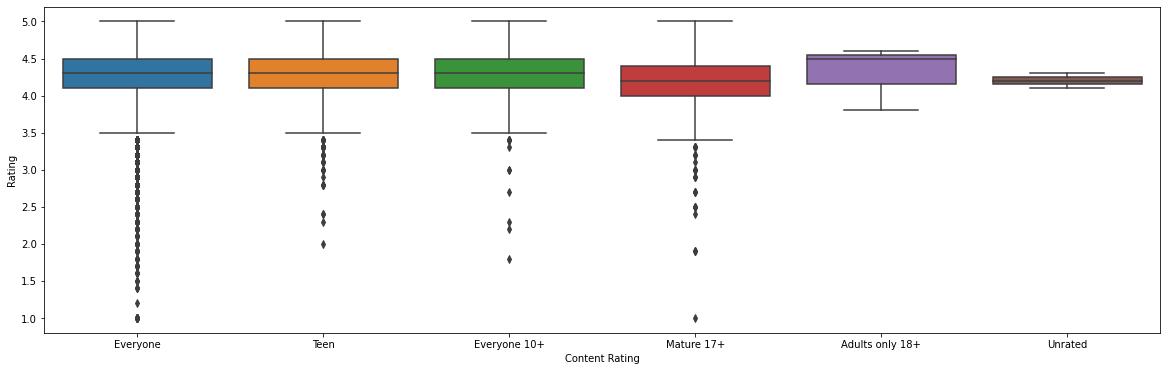

In [88]:
sns.boxplot(x= "Content Rating", y="Rating", data=df)

Text(0.5, 1.0, 'The number of categories')

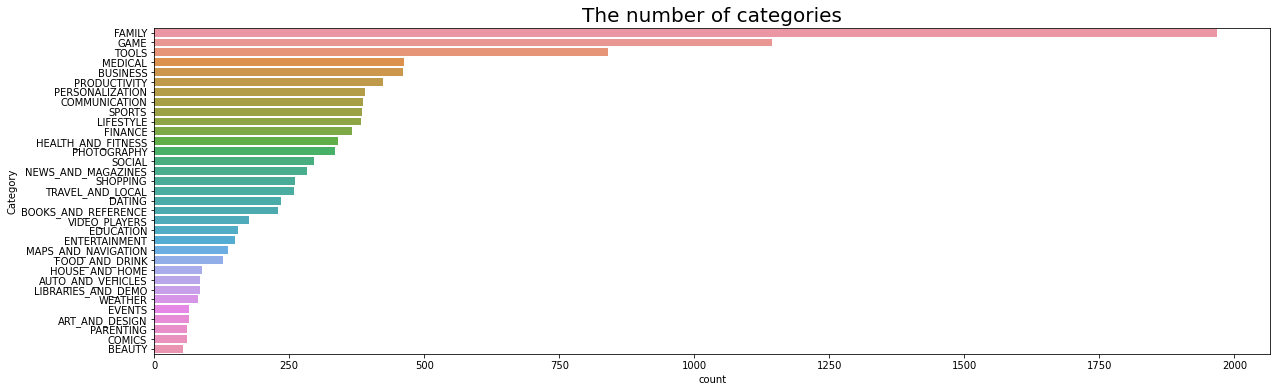

In [91]:
cat_num= df["Category"].value_counts()
sns.barplot(x=cat_num, y=cat_num.index, data=df)
plt.title("The number of categories", size=20)

<Axes: xlabel='Price', ylabel='Category'>

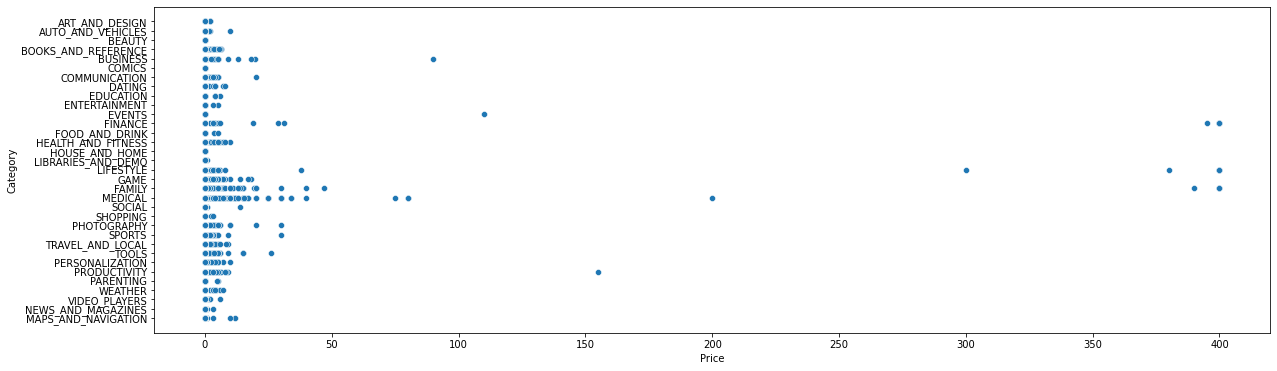

In [92]:
sns.scatterplot(data = df, y="Category", x= "Price")

<Axes: >

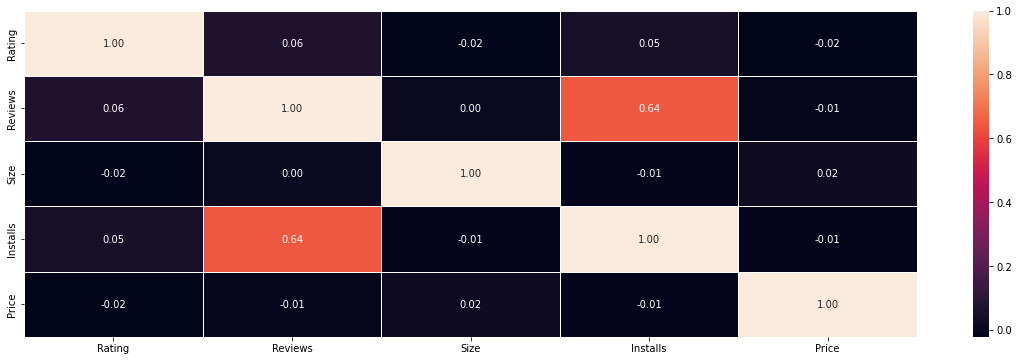

In [95]:
#corr(): sayısal değişkenler arasındaki korelasyonu bulmak için
#annot=True: Değişkenlerin isimlerinin yazılması için
#linewidths: hücreler arasındaki boşluk için


# Sayısal sütunlar üzerinde çalışmak için veri çerçevesini filtrele
numeric_df = df.select_dtypes(include=np.number)

# Korelasyon matrisini hesapla
correlation_matrix = numeric_df.corr()

# Korelasyon matrisinin ısı haritasını çiz
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, fmt=".2f")
